In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
bank_data=pd.read_csv("datalab_export_2025-09-10 11_00_14.csv")

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           100 non-null    int64  
 1   age             100 non-null    int64  
 2   job             100 non-null    object 
 3   marital         100 non-null    object 
 4   education       100 non-null    object 
 5   default         100 non-null    object 
 6   housing         100 non-null    object 
 7   loan            100 non-null    object 
 8   contact         100 non-null    object 
 9   month           100 non-null    object 
 10  day_of_week     100 non-null    object 
 11  duration        100 non-null    int64  
 12  campaign        100 non-null    int64  
 13  pdays           100 non-null    int64  
 14  previous        100 non-null    int64  
 15  poutcome        100 non-null    object 
 16  emp.var.rate    100 non-null    float64
 17  cons.price.idx  100 non-null    floa

In [4]:
bank_data

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,45,services,married,professional.course,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
96,96,42,management,married,university.degree,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
97,97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
98,98,37,technician,single,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [5]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [6]:
feature_cols = ['age', 'default', 'cons.price.idx', 'cons.conf.idx']
X = bank_data[feature_cols]
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred = rf.predict(X_test)

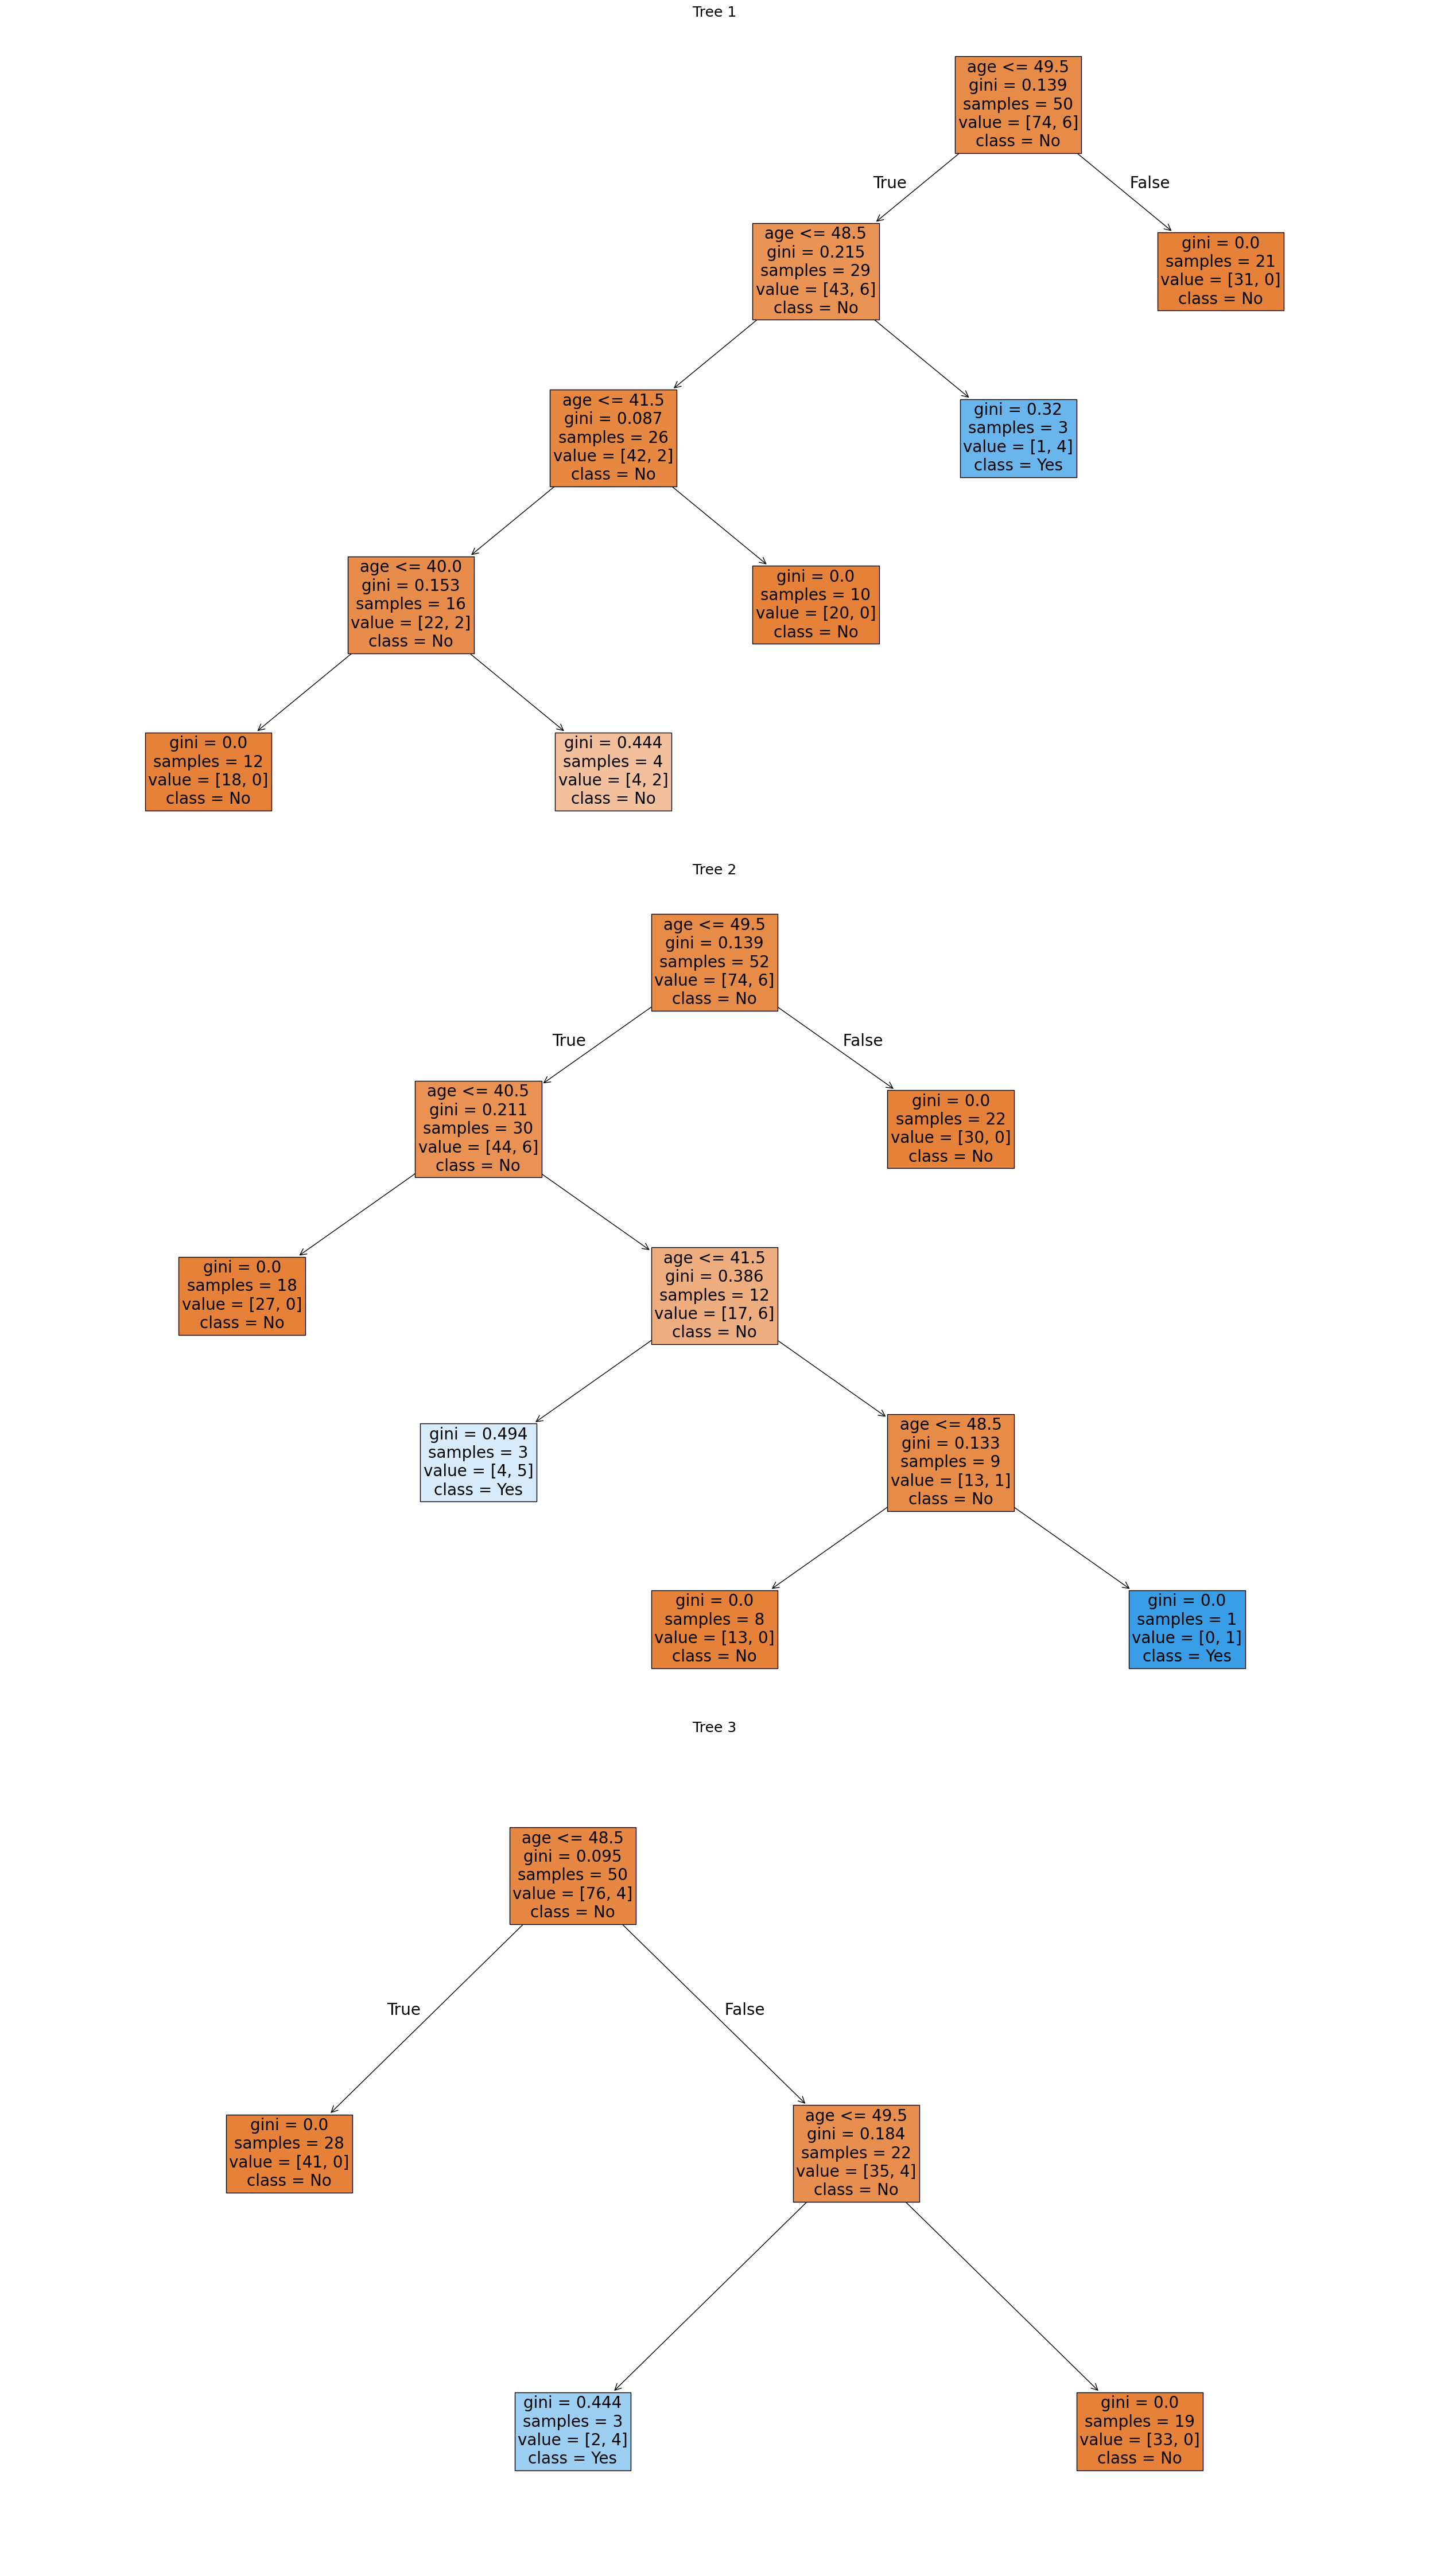

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
n_trees_to_plot = 3  
plt.figure(figsize=(25, 45))  

for i in range(n_trees_to_plot):
    plt.subplot(n_trees_to_plot, 1, i + 1) 
    plot_tree(
        rf.estimators_[i],
        filled=True,
        feature_names=X.columns,
        class_names=["No", "Yes"],
        fontsize=20
    )
    plt.title(f"Tree {i+1}", fontsize=18)

plt.tight_layout()
plt.show()


In [10]:
print("Unique values in y_train:", y_train.value_counts())
print("Unique values in y_test:", y_test.value_counts())
print("Unique values in predictions:", pd.Series(y_pred).value_counts())

Unique values in y_train: y
0    77
1     3
Name: count, dtype: int64
Unique values in y_test: y
0    20
Name: count, dtype: int64
Unique values in predictions: 0    20
Name: count, dtype: int64


c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


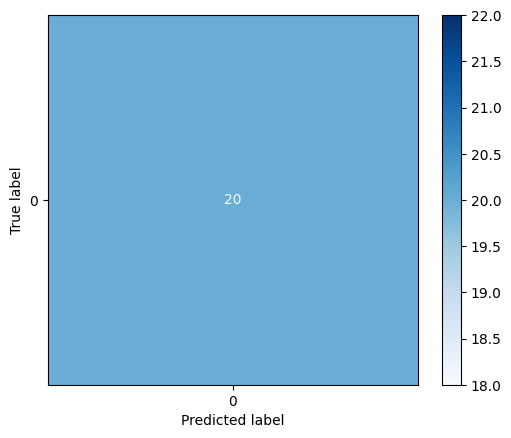

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print("Confusion Matrix: ",cm)
print("Accuracy: ",acc)
print("Precision: ",prec)
print("Recall: ",rec)
print("F1: ",f1)

Confusion Matrix:  [[20]]
Accuracy:  1.0
Precision:  0.0
Recall:  0.0
F1:  0.0


c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
